In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import test_score as ts
import random
from collections import Counter

In [3]:
def getSamplePred(true_values, num_size):
    # shuffling the indices for changing values
    index = [i for i in range(true_values.shape[0])]
    np.random.shuffle(index)
#     true_values = true_values.set_index([index]).sort_index()
    pred = true_values.copy()
    max_val = true_values.max(axis=0)
    min_val = true_values.min(axis=0)
    for i in range(num_size):
        pred.iloc[index[i],0] = random.randint(int(min_val), int(max_val))
    return pred

In [8]:
# get true values
true_values = pd.read_csv('true_values.csv', header = None)

num_predictors = 3
predictors = []
scores = []
alpha = 1

# creating predictors from true values
for i in range(num_predictors):
    # get predictor
    pred = getSamplePred(true_values,int(true_values.shape[0]/3))
    # append preditcor to preditocrs list
    predictors.append(pred)
    # append score to scores list
    scores.append(ts.score(pred.to_numpy()))

# creating threshold for learners by calculating the mean
mean_threshold = sum(scores)/num_predictors


In [9]:
def gradient(true_values,w,predictors):
    h_new = []
    # for each of the predictors
    for h in predictors:
        h_list = []
        for i in range(true_values.shape[0]):
            # find the residual
            residual = true_values.iloc[i,0] - w[i]
            h_list.append((h.iloc[i,0]-residual)**2)
        # append the index
        h_new.append(sum(h_list))
    return h_new.index(min(h_new))


In [23]:
def predictFunc(predictions, num_size):
    # final prediction list
    pred_list = []
    # for each item
    for i in range(num_size):
        # prediction list for each item
        pred = []
        # in each prediction
        for j in range(len(predictions)):
            pred.append(predictions[j][i][0])
        # get the mode of all all the predictions
        pred_val,num_most_common = Counter(pred).most_common(1)[0]
        pred_list.append(np.asarray([pred_val]))
#         pred_list.append(max(set(pred), key=pred.count))
    return pred_list

In [28]:
score_list = []
mean_score_list = []
learners_list = [10, 20, 30, 40, 50, 100]
for num_learners in [10, 20, 30, 40, 50, 100]:
    final_pred = []
    for l in range(num_learners):
        # creating initial weights
        w = getSamplePred(true_values,true_values.shape[0]).to_numpy()
        while(True):
            # choosing a random combination of the given predictors
            for i in range(len(w)):
                w[i] = predictors[random.randint(0, num_predictors-1)].iloc[i,0]
            # breaking condition for weak learners
            if ts.score(w) <= mean_threshold:
                break
    # num_learners = 3
    # final_pred = []
    # for l in range(num_learners):
    #     # creating initial weights
    #     w = getSamplePred(true_values,true_values.shape[0]).to_numpy()
    #     for i in range(len(w)):
    #         w[i] = predictors[random.randint(0, num_predictors-1)].iloc[i,0]
    #     prev_score = 0
    #     while(True):
    #         # get the gradient 
    #         h_new = gradient(true_values.copy(),w,predictors)
    #         # update the w (f) vector
    #         for i in range(true_values.shape[0]):
    #             w[i] -= alpha *  predictors[h_new].iloc[i,0]
    #             if w[i] < 0:
    #                 w[i] = 0
    # #         w += alpha*predictors[h_new].to_numpy()
    #         # calculate score
    #         cur_score = ts.score(w)
    #         # threshold criteria
    #         if cur_score < mean_threshold:
    #             break
    #         # adjust alpha for better results
    #         elif cur_score < 2 * mean_threshold:
    #             alpha = 0.1
    #         if abs(prev_score - cur_score) < 0.01:
    #             break
    #         prev_score = cur_score
        final_pred.append(w)
    #     print(prev_score)
    # boosting prediction
    final_predictions = np.asarray(predictFunc(final_pred,true_values.shape[0]))
    # appending score for plots
    score_list.append(ts.score(final_predictions))
    mean_score_list.append(mean_threshold)

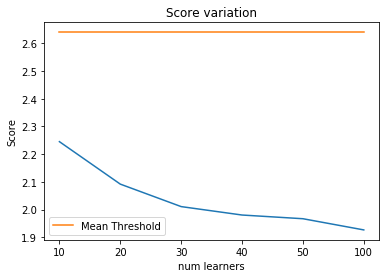

In [29]:
plt.clf()
plt.plot(score_list)
plt.plot(mean_score_list,label="Mean Threshold")
plt.title("Score variation")
plt.xlabel("num learners")
plt.ylabel("Score")
plt.xticks(list(range(len(learners_list))), learners_list)
plt.legend()
plt.savefig(fname='score.png',format='png')